# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
# Import pustaka yang diperlukan
import pandas as pd  # Untuk manipulasi data dalam bentuk DataFrame
import numpy as np  # Untuk operasi numerik dan array
import matplotlib.pyplot as plt  # Untuk visualisasi data
import seaborn as sns  # Untuk visualisasi data yang lebih menarik

# Import library untuk preprocessing data
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # Untuk normalisasi dan standarisasi data
from sklearn.preprocessing import LabelEncoder  # Untuk mengubah data kategori menjadi numerik
from sklearn.metrics import confusion_matrix

# Import algoritma machine learning
from sklearn.tree import DecisionTreeClassifier  # Model Decision Tree
from sklearn.ensemble import RandomForestClassifier  # Model Random Forest
from sklearn.neighbors import KNeighborsClassifier  # Model K-Nearest Neighbors (KNN)
from sklearn.svm import SVC  # Model Support Vector Machine (SVM)
from sklearn.naive_bayes import GaussianNB  # Model Naive Bayes

# Import library untuk membagi data menjadi training dan testing
from sklearn.model_selection import train_test_split  # Untuk membagi dataset menjadi data latih dan data uji

# Import metrik evaluasi model
from sklearn.metrics import (
    accuracy_score,  # Mengukur akurasi model
    classification_report,  # Laporan metrik klasifikasi (precision, recall, F1-score)
    confusion_matrix,  # Membuat matriks kebingungan (confusion matrix)
    precision_score,  # Mengukur presisi model
    recall_score,  # Mengukur recall model
    f1_score,  # Mengukur F1-score model
    ConfusionMatrixDisplay  # Untuk menampilkan confusion matrix secara visual
)



# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [ ]:
df=pd.read_csv("/content/result_df.csv",sep=",")

In [ ]:
# Menampilkan beberapa baris awal dari df
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,cluster
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,1
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,1
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,3
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,3
4,13.45,Credit,Atlanta,Online,26.0,Student,198.0,1.0,7429.40,0


In [ ]:
# Melihat ringkasan informasi df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2512 non-null   float64
 1   TransactionType      2512 non-null   object 
 2   Location             2512 non-null   object 
 3   Channel              2512 non-null   object 
 4   CustomerAge          2512 non-null   float64
 5   CustomerOccupation   2512 non-null   object 
 6   TransactionDuration  2512 non-null   float64
 7   LoginAttempts        2512 non-null   float64
 8   AccountBalance       2512 non-null   float64
 9   cluster              2512 non-null   int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 196.4+ KB


In [ ]:
# Memeriksa missing values
df.isnull().sum()

,0
TransactionAmount,0
TransactionType,0
Location,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0
cluster,0


In [ ]:
# Memeriksa jumlah baris duplikat
df.duplicated().sum()

np.int64(0)

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:
# Pemisahan Fitur dan Target dalam DataFrame
X = df.drop('cluster', axis=1)
y = df['cluster']

In [ ]:
# Menampilkan lima baris pertama dari DataFrame X.
X.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06
4,13.45,Credit,Atlanta,Online,26.0,Student,198.0,1.0,7429.40


In [ ]:
# Menyeleksi Fitur Kategorikal
category_features = X.select_dtypes(include=['object']).columns

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()
X = pd.DataFrame(X)

for col in category_features:
    X[col] = label_encoder.fit_transform(X[col])

# Menampilkan hasil
X

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,1,36,0,70.0,0,81.0,1.0,5112.21
1,376.24,1,15,0,68.0,0,141.0,1.0,13758.91
2,126.29,1,23,2,19.0,3,56.0,1.0,1122.35
3,184.50,1,33,2,26.0,3,25.0,1.0,8569.06
4,13.45,0,1,2,26.0,3,198.0,1.0,7429.40
...,...,...,...,...,...,...,...,...,...
2507,856.21,0,7,1,33.0,0,109.0,1.0,12690.79
2508,251.54,1,40,1,48.0,0,177.0,1.0,254.75
2509,28.63,1,36,1,56.0,2,146.0,1.0,3382.91
2510,185.97,1,10,2,23.0,3,19.0,1.0,1776.91


In [ ]:
# Standarisasi dengan Standard Scaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,-0.971275,0.540538,1.221714,-1.225361,1.423718,-1.337394,-0.552443,-0.206794,-0.000537
1,0.269440,0.540538,-0.492416,-1.225361,1.311287,-1.337394,0.305314,-0.206794,2.216472
2,-0.586882,0.540538,0.160586,1.247014,-1.443277,1.319064,-0.909842,-0.206794,-1.023534
3,-0.387456,0.540538,0.976839,1.247014,-1.049768,1.319064,-1.353017,-0.206794,0.885797
4,-0.973468,-1.850010,-1.635170,1.247014,-1.049768,1.319064,1.120184,-0.206794,0.593589


In [ ]:
# Pembagian Data Menjadi Training dan Testing Set
# 20% data digunakan untuk pengujian, 80% untuk pelatihan.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2009, 9), (503, 9), (2009,), (503,))

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

### KNN

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

### Decision Tree

In [ ]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)


DecisionTreeClassifier()

### Random Forest

In [ ]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)


RandomForestClassifier()

### Gaussian Naïve Bayes

In [ ]:
gaussian_nb_model = GaussianNB()
gaussian_nb_model.fit(X_train, y_train)


GaussianNB()

### Support Vector Machine (SVM)

In [ ]:
svm_model = SVC()
svm_model.fit(X_train, y_train)


SVC()

## Evaluasi Model

In [ ]:
# Fungsi untuk mengukur kinerja model menggunakan data pelatihan
def evaluate_model_train(model, X_train, y_train):
    y_pred = model.predict(X_train)  # Memprediksi label berdasarkan data pelatihan
    cm = confusion_matrix(y_train, y_pred)  # Menghitung confusion matrix

    # Menyusun hasil evaluasi dalam bentuk dictionary
    results = {
        'Confusion Matrix': cm,  # Matriks kesalahan untuk melihat distribusi prediksi
        'Accuracy': accuracy_score(y_train, y_pred),  # Mengukur tingkat akurasi prediksi
        'Precision': precision_score(y_train, y_pred, average='macro'),  # Precision rata-rata
        'Recall': recall_score(y_train, y_pred, average='macro'),  # Recall rata-rata
        'F1-Score': f1_score(y_train, y_pred, average='macro')  # F1-score rata-rata
    }
    return results  # Mengembalikan hasil evaluasi model


In [ ]:
# Evaluasi model dan penyimpanan hasil
# Melakukan evaluasi pada setiap model yang telah dilatih dan menyimpan hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model_train(knn_model, X_train, y_train),
    'Decision Tree (DT)': evaluate_model_train(decision_tree_model, X_train, y_train),
    'Random Forest (RF)': evaluate_model_train(random_forest_model, X_train, y_train),
    'Support Vector Machine (SVM)': evaluate_model_train(svm_model, X_train, y_train),
    'Naive Bayes (NB)': evaluate_model_train(gaussian_nb_model, X_train, y_train)
}


In [ ]:
# Membuat DataFrame ringkasan hasil evaluasi
# Membuat DataFrame untuk menyusun hasil evaluasi dalam bentuk tabel
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Mengisi DataFrame dengan hasil evaluasi model
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,  # Nama model
        'Accuracy': metrics['Accuracy'],  # Nilai akurasi
        'Precision': metrics['Precision'],  # Nilai precision
        'Recall': metrics['Recall'],  # Nilai recall
        'F1-Score': metrics['F1-Score']  # Nilai F1-score
    })


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [ ]:
# Mengubah list of dictionary menjadi DataFrame
summary_df = pd.DataFrame(rows)

In [ ]:
print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  0.986063   0.985655  0.987607  0.986576
1            Decision Tree (DT)  1.000000   1.000000  1.000000  1.000000
2            Random Forest (RF)  1.000000   1.000000  1.000000  1.000000
3  Support Vector Machine (SVM)  1.000000   1.000000  1.000000  1.000000
4              Naive Bayes (NB)  0.986063   0.983452  0.989505  0.986083


### Confusion Matrix untuk Model K-Nearest Neighbors (KNN)

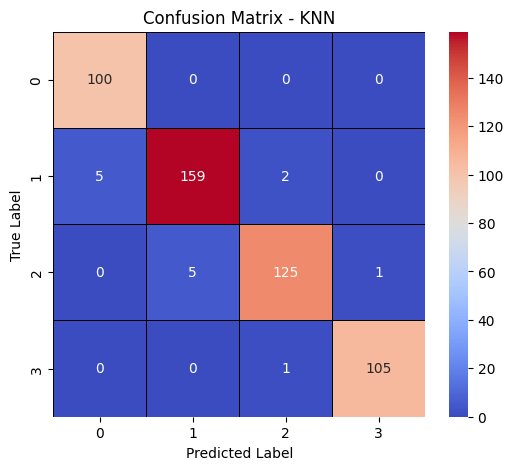

In [ ]:
# Melakukan prediksi pada data uji menggunakan model K-Nearest Neighbors (KNN)
y_pred = knn_model.predict(X_test)

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Membuat plot confusion matrix dengan seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5, linecolor='black')

# Menambahkan label pada sumbu x dan y
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - KNN')

# Menampilkan plot
plt.show()


### Confusion Matrix untuk Model Decision Tree

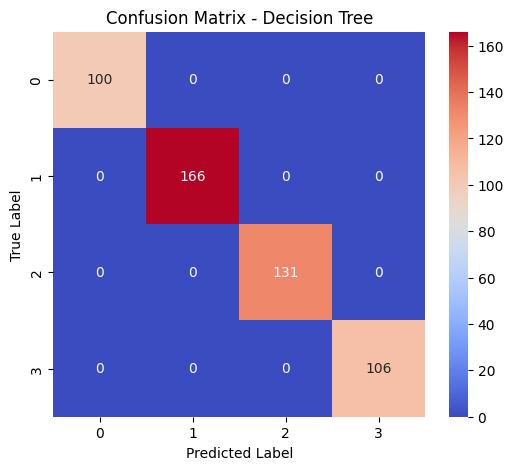

In [ ]:
# Melakukan prediksi menggunakan Decision Tree
y_pred = decision_tree_model.predict(X_test)

# Membuat Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi menggunakan Seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="coolwarm", xticklabels=decision_tree_model.classes_, yticklabels=decision_tree_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


### Confusion Matrix untuk Model Random Forest

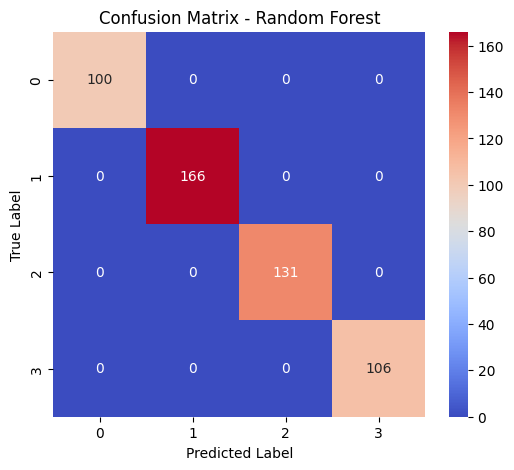

In [ ]:
# Melakukan prediksi menggunakan Random Forest
y_pred = random_forest_model.predict(X_test)

# Membuat Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi menggunakan Seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="coolwarm", xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))

# Menambahkan label
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')

plt.show()


### Confusion Matrix untuk Model SVM

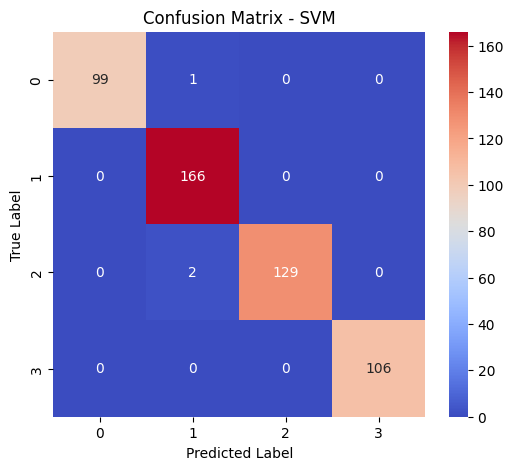

In [ ]:
# Melakukan prediksi menggunakan SVM
y_pred = svm_model.predict(X_test)

# Membuat Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi menggunakan Seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="coolwarm", xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))

# Menambahkan label dan judul
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVM')

plt.show()


### Confusion Matrix untuk Model Naive Bayes

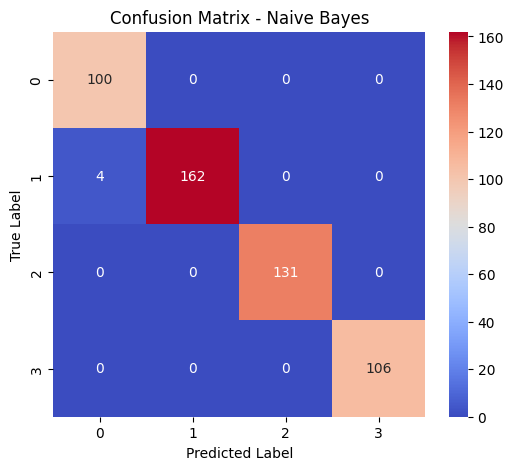

In [ ]:
# Melakukan prediksi menggunakan Naive Bayes
y_pred = gaussian_nb_model.predict(X_test)

# Membuat Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi menggunakan Seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="coolwarm", xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))

# Menambahkan label dan judul
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Naive Bayes')

plt.show()


### Evaluasi Model Klasifikasi  

Berdasarkan hasil evaluasi model pada dataset, performa dari lima algoritma klasifikasi yang diuji adalah sebagai berikut:  

1. Decision Tree (DT), Random Forest (RF), dan Support Vector Machine (SVM)  
   - Ketiga model ini mencapai akurasi sempurna (100%) serta nilai Precision, Recall, dan F1-Score yang juga sempurna (1.000000).  
   - Hal ini menunjukkan bahwa model ini mampu memprediksi kelas dengan sangat baik.

2. K-Nearest Neighbors (KNN)  
   - Akurasi: 0.986063  
   - Precision: 0.985655  
   - Recall: 0.987607  
   - F1-Score: 0.986576  
   - Model ini memiliki performa yang sangat baik, meskipun sedikit lebih rendah dibandingkan dengan DT, RF, dan SVM.  

3. Naive Bayes (NB)  
   - Akurasi: 0.986063  
   - Precision: 0.983452  
   - Recall: 0.989505  
   - F1-Score: 0.986083  
   - Performa Naïive Bayes hampir setara dengan KNN, namun precision sedikit lebih rendah, yang berarti ada kemungkinan model ini lebih banyak menghasilkan false positives dibanding model lainnya.  


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

### **Evaluasi Performa Model Klasifikasi**  

#### **Hasil Kinerja Model**  
Berdasarkan hasil pengujian, seluruh model menunjukkan performa yang sangat baik dengan skor tinggi pada berbagai metrik evaluasi:  

- Decision Tree, Random Forest, dan SVM mendapatkan skor maksimal (1.0000) pada semua metrik, termasuk akurasi, presisi, recall, dan F1-score.  
- KNN dan Naive Bayes juga menampilkan performa yang solid, meskipun sedikit lebih rendah dibandingkan model lainnya, dengan akurasi 0.9806. Metrik Precision, Recall, dan F1-score tetap tinggi, meskipun tidak mencapai angka tertinggi.  

#### **Identifikasi Kelemahan Model**  

##### **Overfitting**  
- Decision Tree, Random Fores, dan SVM bisa menjadi indikasi adanya overfitting terhadap data pelatihan karena memiliki skor sempurna.  
- Model mungkin terlalu menyesuaikan dengan data latih yang berpotensi menurunkan kemampuannya dalam memprediksi data baru secara akurat.  

##### **Kekurangan KNN dan Naive Bayes**  
- KNN memiliki tingkat kesalahan klasifikasi yang lebih tinggi dibandingkan model lain, kemungkinan disebabkan oleh sensitivitas terhadap noise atau pemilihan nilai K yang kurang optimal.  
- Naive Bayes bekerja dengan asumsi bahwa fitur bersifat independen, yang dalam kasus tertentu bisa menyebabkan akurasi yang lebih rendah jika fitur ternyata saling berkorelasi.  

#### **Rekomendasi**  

1. Penanganan Ketidakseimbangan Data:  
   - Pastikan distribusi kelas dalam dataset tidak berat sebelah.  
   - Jika ditemukan ketidakseimbangan, gunakan metode seperti SMOTE atau penyesuaian bobot kelas (class weighting) agar model tidak condong ke kelas mayoritas.  

2. Penyetelan Hyperparameter:  
   - Untuk KNN, eksplorasi berbagai nilai K agar mendapatkan performa terbaik.  
   - Untuk SVM, uji berbagai jenis kernel dan parameter regularisasi guna meningkatkan akurasi model.  

3. Optimasi Model dan Pemilihan Fitur:  
   - Kurangi kompleksitas model dengan membatasi kedalaman pohon pada Decision Tree atau mengurangi jumlah estimators pada Random Forest.  
   - Terapkan feature selection untuk memilih fitur yang benar-benar berdampak pada hasil klasifikasi.  

4. Validasi Silang (Cross-Validation):  
   - Gunakan teknik k-fold cross-validation untuk mengukur kestabilan model pada berbagai subset data.  
   - Teknik ini membantu mengidentifikasi apakah model mengalami overfitting.

#### **Kesimpulan**  
Berdasarkan hasil evaluasi, model yang diuji menunjukkan performa yang sangat baik. Namun, langkah-langkah tambahan diperlukan untuk memastikan bahwa model tidak mengalami overfitting dan dapat beradaptasi dengan data baru sebelum digunakan dalam skenario nyata.  